In [72]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.cluster import KMeans
%matplotlib inline

Get the dataset and load it into a pandas Dataframe



In [3]:
df=pd.read_csv("C:\\Users\\Rayhaan\\Desktop\\IBM Machine Learning Cert\\Unsupervised Learning\\Dataset\\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


- Check for any missing values or na values
- check the shape of the data

In [4]:
isnull=df.isnull().sum()
isna=df.isna().sum()
print(' the number of null values are : \n', isnull)
print('\n the number of na values are :\n ', isna)
print('\n shape of the data is: ', df.shape)

 the number of null values are : 
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

 the number of na values are :
  Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

 shape of the data is:  (440, 8)


We can see that there are not null values or na values.
Also we see that the dataset has 8 features and 440 rows

Now we aim at checking the info of the dataset, that is the datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


we see that each of the variables are of type int64.
We want to see if they are really continuous variables or just categorical variables that have been encoded.

In [6]:
df.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

From the above we see that the Channel and Region have less than 3 unique values, indicating categorical variables that have been encoded.
Our aim is to separate the continuous and numerical variables into 2 sets of arrays for further statistical analysis.

In [8]:
numerical_columns=df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
categorical_columns=df[['Channel','Region']]

Now let us find some central tendency of the the numerical variables and some stats about the categorical variables.

In [9]:
numerical_columns.describe(include='all')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
categorical_columns['Channel']=categorical_columns['Channel'].astype('category')
categorical_columns['Region']=categorical_columns['Region'].astype('category')
categorical_columns.describe(include='all')

C:\Users\Rayhaan\AppData\Local\Temp\ipykernel_30872\744545149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns['Channel']=categorical_columns['Channel'].astype('category')
C:\Users\Rayhaan\AppData\Local\Temp\ipykernel_30872\744545149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns['Region']=categorical_columns['Region'].astype('category')


,Channel,Region
count,440,440
unique,2,3
top,1,3
freq,298,316


<h1> Univariate Analysis </h1>

We will now perform some univariate analysis on the numerical columns.
We will do so with histograms and box and whiskers plot

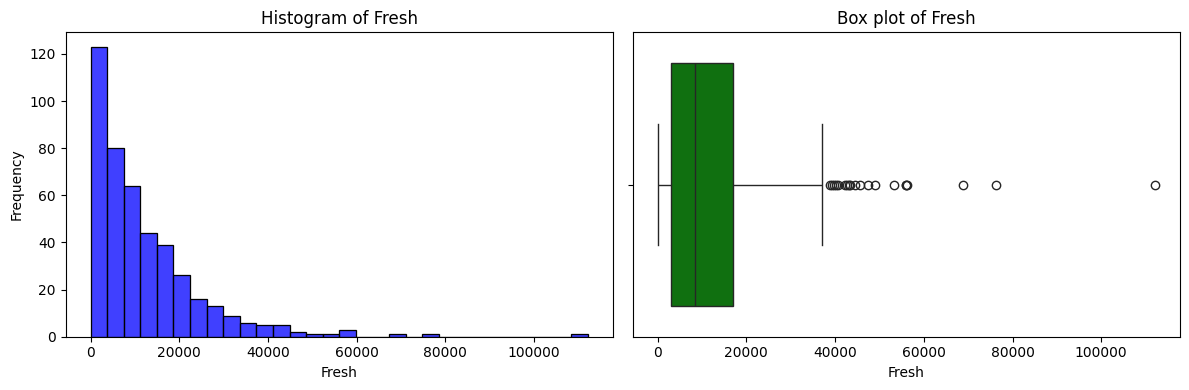

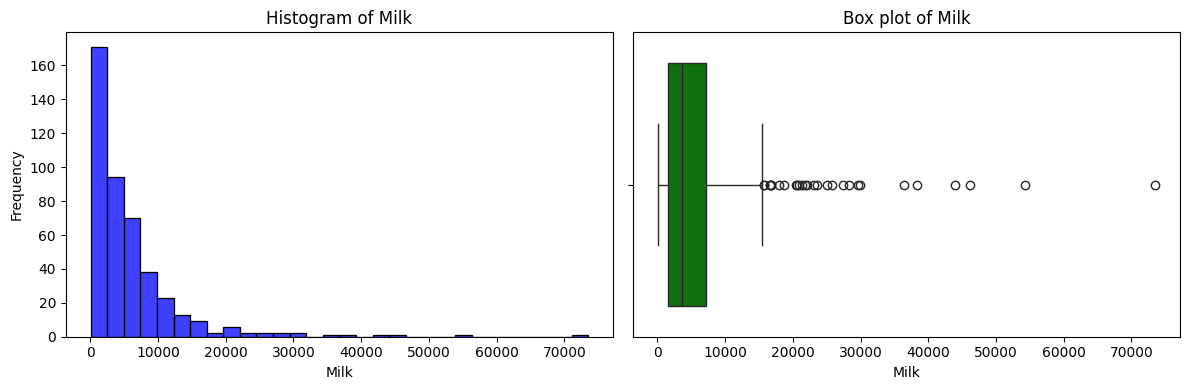

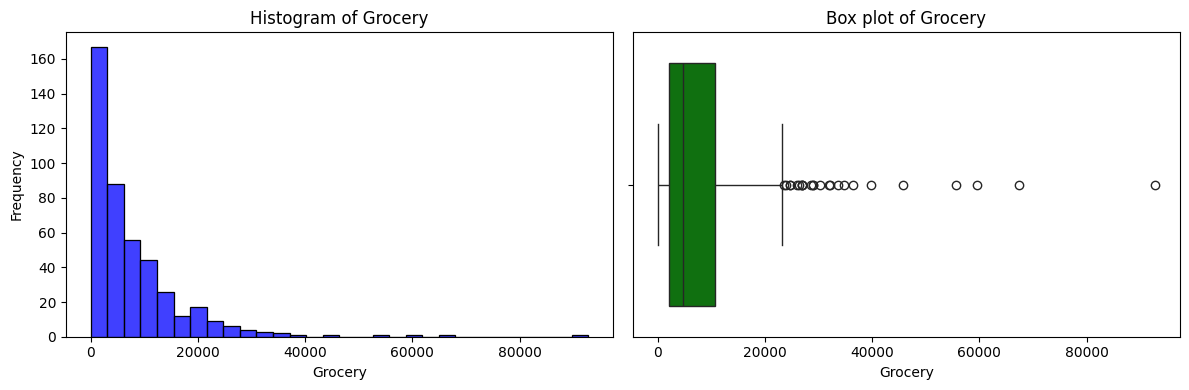

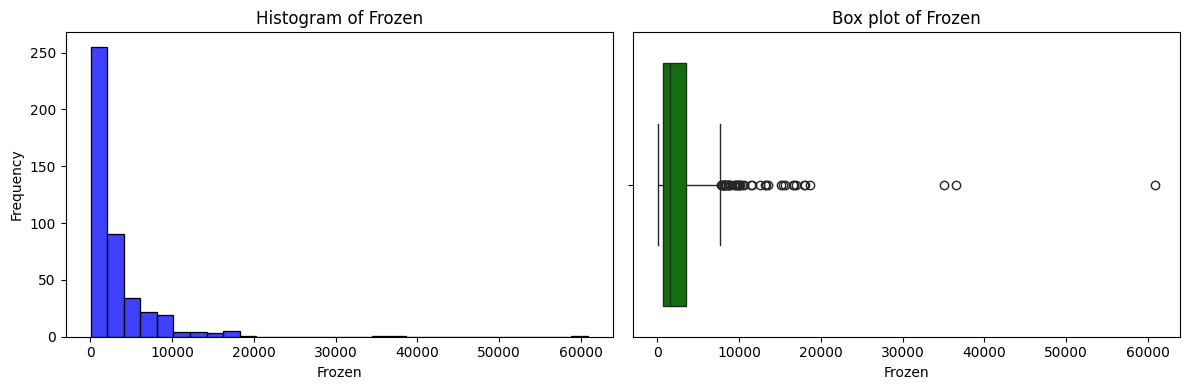

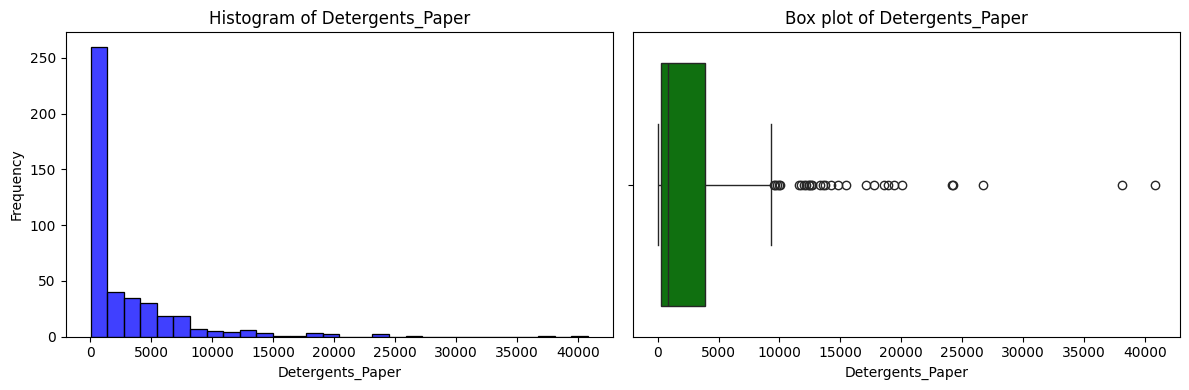

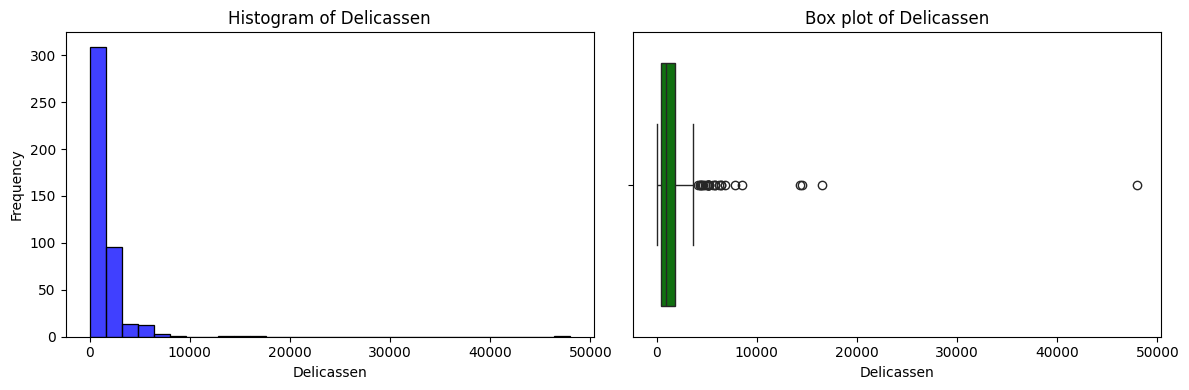

In [13]:
for col in numerical_columns:
    plt.figure(figsize=(12, 4))  # Set figure size for each pair of plots
    
    # Histogram
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
    sns.histplot(numerical_columns[col], kde=False, bins=30, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Box plot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
    sns.boxplot(x=numerical_columns[col], color='green')
    plt.title(f'Box plot of {col}')
    
    # Show plots
    plt.tight_layout()
    plt.show()

We see that all of our data is skewed and they have some outliers present.
Outliers are Q1-1.5*IQR or Q3+1.5*IQR


In [27]:
outlier_indices = []
# common_outlier_indices = set(numerical_columns.index)
# print(common_outlier_indices)
for col in numerical_columns.columns:

    Q1 = numerical_columns[col].quantile(0.25)
    Q3 = numerical_columns[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detecting outliers
    outliers = numerical_columns[(numerical_columns[col] < lower_bound) | (numerical_columns[col] > upper_bound)]
    outlier_indices.extend(outliers.index)
    print(f'the outliers for {col} is : \n',outliers[col])

outlier_count=Counter(outlier_indices)
common_outliers=[elem for elem,count in outlier_count.items() if count >=3]
print("Common outlier indices across all columns are:", common_outliers)


the outliers for Fresh is : 
 29      43088
39      56159
47      44466
52      40721
87      43265
103     56082
125     76237
129     42312
176     45640
181    112151
239     47493
258     56083
259     53205
282     49063
284     68951
285     40254
289     42786
370     39679
377     38793
436     39228
Name: Fresh, dtype: int64
the outliers for Milk is : 
 23     36423
28     20484
38     15729
45     22044
47     54259
49     21412
56     29892
61     38369
65     20959
85     46197
86     73498
92     27472
109    16729
163    15726
171    25862
181    29627
183    43950
211    28326
216    16599
251    23133
254    17972
265    23527
309    20655
319    25071
325    16784
358    18664
384    21858
427    16687
Name: Milk, dtype: int64
the outliers for Grocery is : 
 28     25957
43     23998
47     55571
49     28921
56     26866
61     59598
65     45828
77     28540
85     92780
86     32114
92     32034
109    28986
145    34792
163    26870
201    24708
205    23596
211   

Drop the outliers from the DF and numerical columns

In [29]:
df_dropped = df.drop(common_outliers)
numerical_columns=numerical_columns.drop(common_outliers)
categorical_columns=categorical_columns.drop(common_outliers)


Now lets check the skewness of each variable for the numerical data as skewness might affect clustering and PCA

In [30]:
skewness=numerical_columns.skew()
print(skewness)

Fresh               1.920883
Milk                2.200713
Grocery             2.687604
Frozen              3.260515
Detergents_Paper    3.748666
Delicassen          4.705741
dtype: float64


Let us log transform the columns in the table that have a skew above 0.75

In [31]:
for col in numerical_columns.columns:
    if skewness[col]>0.75:
        numerical_columns[col]=np.log1p(numerical_columns[col])

numerical_columns.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718


<h1> Multivariate Analysis </h1>

We will do scatter plots for each combination of variables to see how they relate to each other, and then we will perform correlation analysis

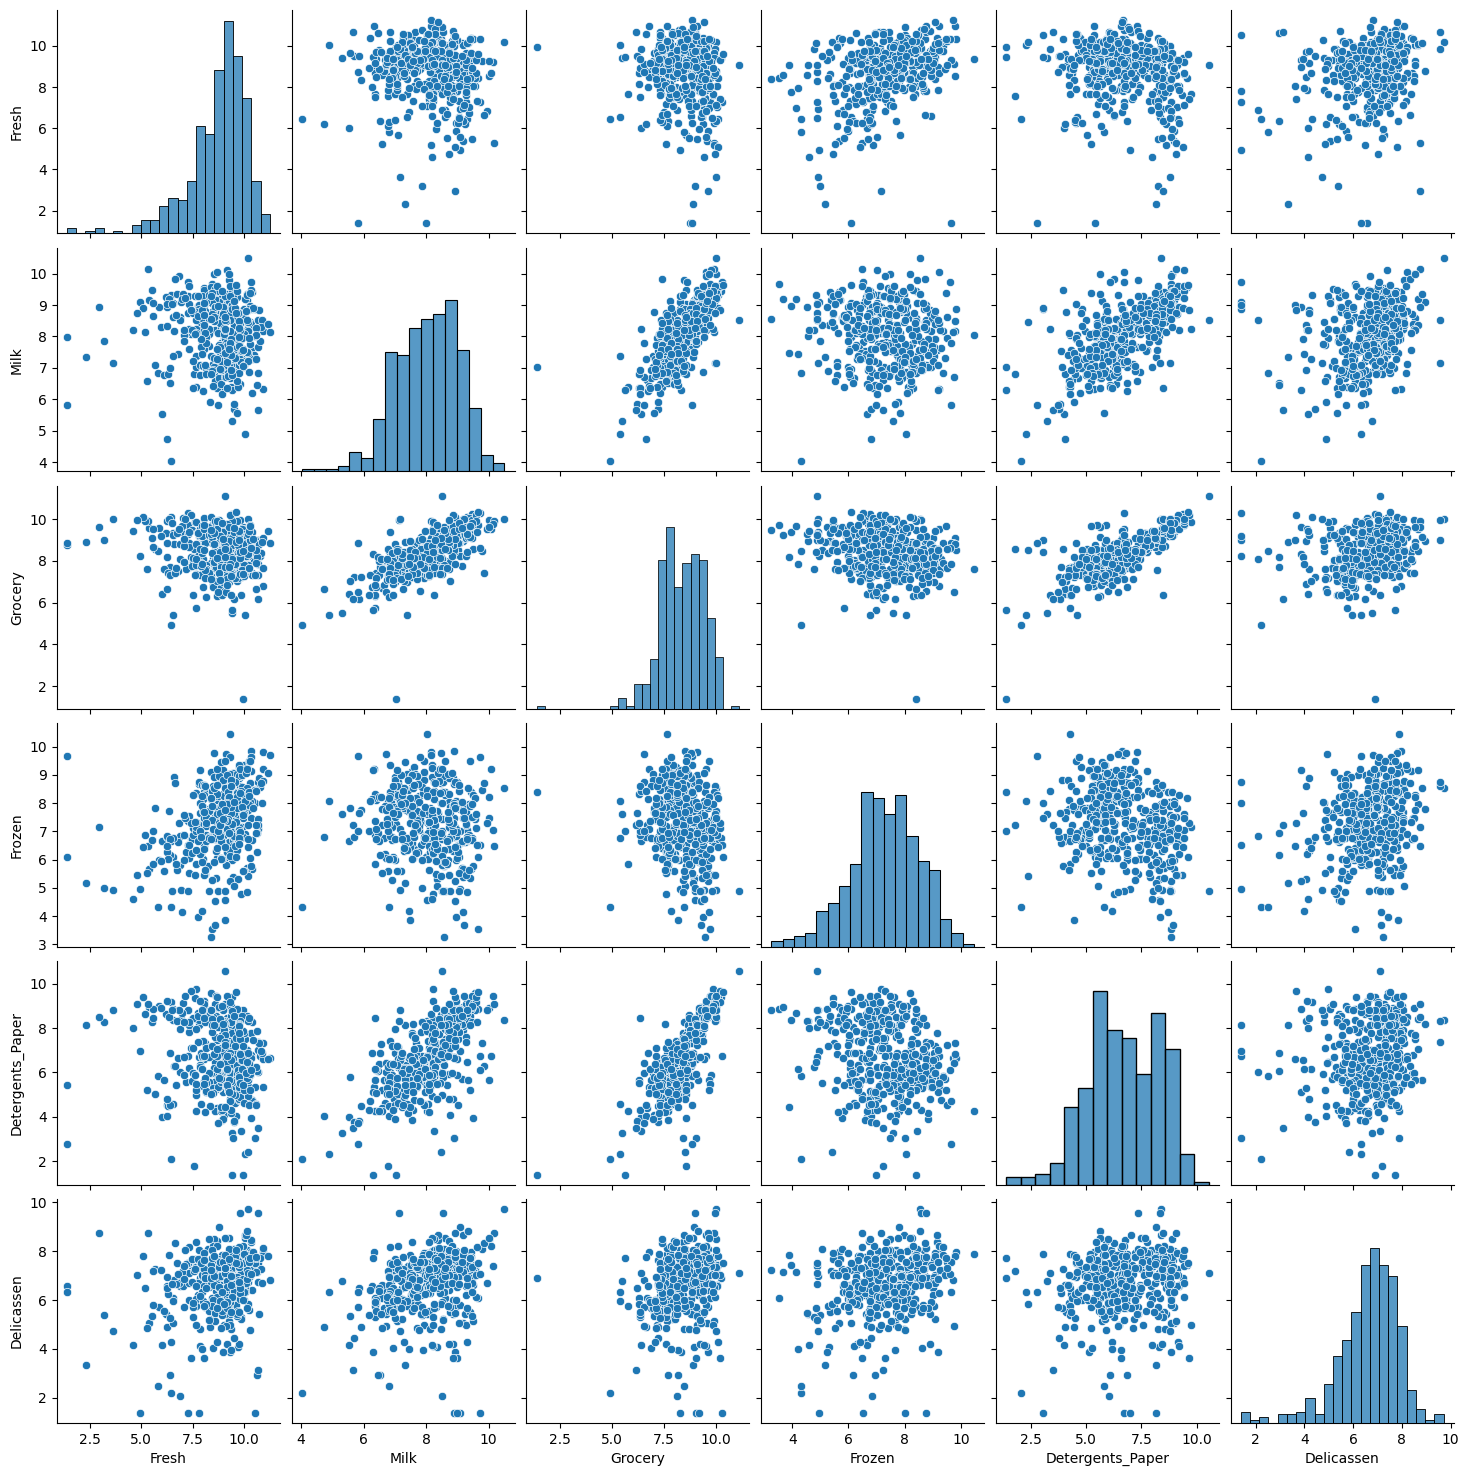

In [33]:
sns.pairplot(numerical_columns)

There seems to be correlation between features Grocery and Detergent Paper, Milk and Grocery.
Let us find the correlation and a heatmap to express the correlation

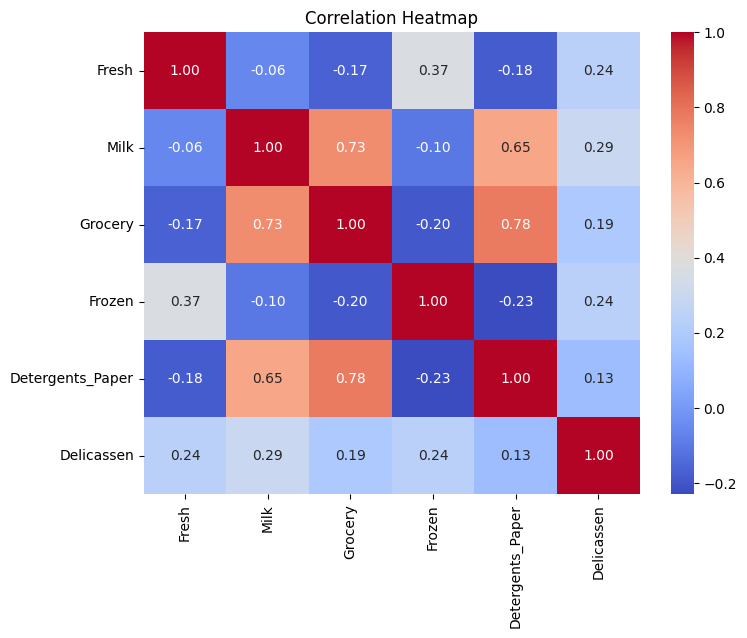

In [36]:
correlation_matrix=numerical_columns.corr()
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

We see that there is some correlation between variables.
Let us perform some PCA to do some dimensionality reduction

In [46]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_columns)
pca = PCA(n_components=6)  # Choose the number of components you want
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_result)


In [47]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')


Explained variance by each component: [0.43341298 0.26257459 0.11041975 0.10441718 0.05474387 0.03443163]


It can be seen from the above that 90 % of the variance in the data can be explained by the first 4 principal components

In [58]:
pca_df.head()

,0,1,2,3,4,5
0,-1.598145,0.100747,0.103433,-1.474721,0.343091,0.258060
1,-1.571368,-0.758611,-0.048862,0.056410,0.157170,0.181057
2,-1.565324,-1.498033,-0.964456,-0.036027,-0.104886,0.339853
3,0.874321,-1.196092,-0.187217,0.424926,-0.742469,-0.409626
4,-0.774474,-1.941810,-0.285751,-0.152121,-0.233424,0.009233


Note: The pca.components_ attribute in PCA (Principal Component Analysis) represents the principal axes in the feature space that explain the directions of maximum variance in the data. These are essentially the eigenvectors of the covariance matrix of the data.

Each principal component is a linear combination of the original features, and the values in pca.components_ indicate the contribution of each original feature to each principal component.

In [64]:
components=pca.components_
print(components.shape)
print(components)
loadings_df = pd.DataFrame(data=components.T, 
                           index=numerical_columns.columns, 
                           columns=[f'PC{i+1}' for i in range(components.shape[0])])
loadings_df.head(10)

(6, 6)
[[ 0.16453252 -0.53025177 -0.56907753  0.1964005  -0.55180237 -0.15765108]
 [-0.5696962  -0.17891309 -0.04321294 -0.55998605  0.01090196 -0.57259564]
 [ 0.60248875  0.08145406  0.14878328  0.11484739  0.20154218 -0.74459848]
 [-0.5313485   0.03537823  0.09062623  0.79521064  0.07300858 -0.26554439]
 [-0.04827587  0.77372978 -0.12981508 -0.04689028 -0.59801582 -0.14945932]
 [-0.02684788  0.2833355  -0.79188502  0.00968942  0.54020632 -0.00124739]]


,PC1,PC2,PC3,PC4,PC5,PC6
Fresh,0.164533,-0.569696,0.602489,-0.531349,-0.048276,-0.026848
Milk,-0.530252,-0.178913,0.081454,0.035378,0.773730,0.283335
Grocery,-0.569078,-0.043213,0.148783,0.090626,-0.129815,-0.791885
Frozen,0.196401,-0.559986,0.114847,0.795211,-0.046890,0.009689
Detergents_Paper,-0.551802,0.010902,0.201542,0.073009,-0.598016,0.540206
Delicassen,-0.157651,-0.572596,-0.744598,-0.265544,-0.149459,-0.001247


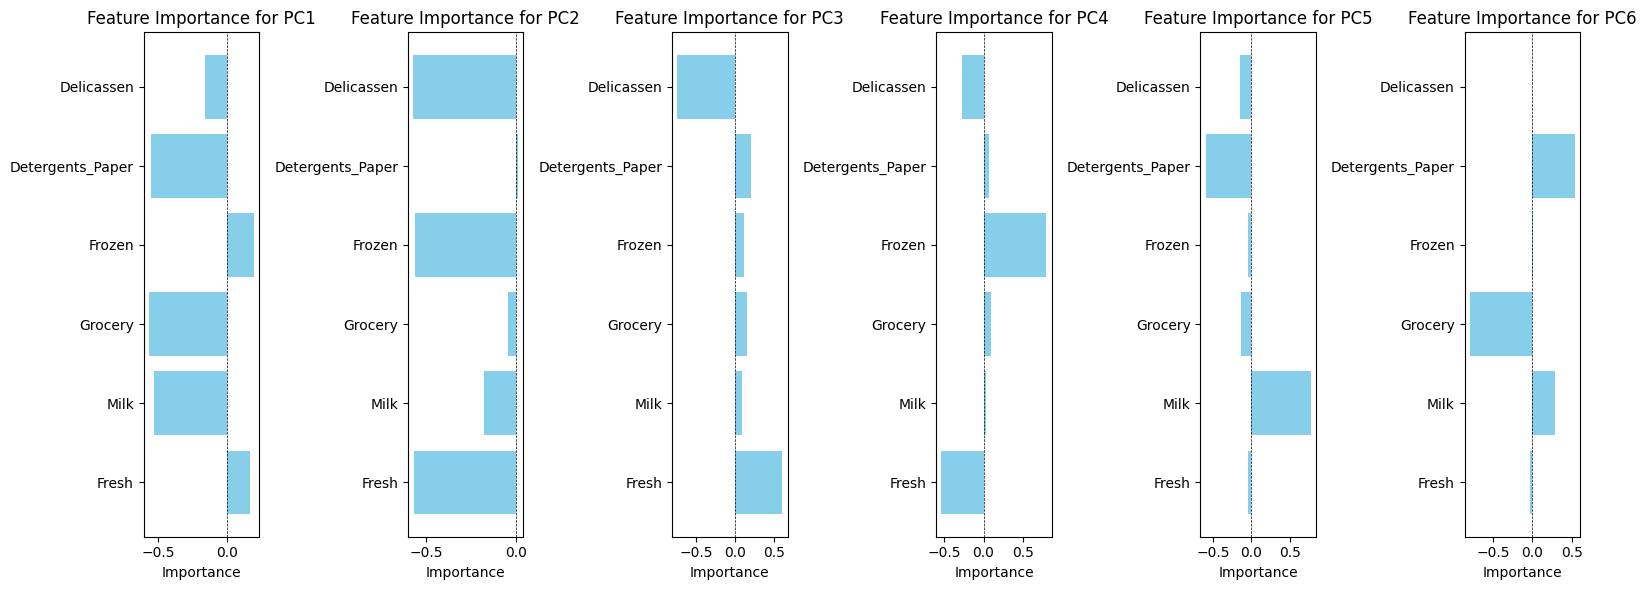

In [65]:
# Plotting PCA
plt.figure(figsize=(16, 6))
for i in range(loadings_df.shape[1]):
    plt.subplot(1, loadings_df.shape[1], i + 1)
    plt.barh(loadings_df.index, loadings_df.iloc[:, i], color='skyblue')
    plt.title(f'Feature Importance for {loadings_df.columns[i]}')
    plt.xlabel('Importance')
    plt.axvline(0, color='black', lw=0.5, ls='--')

plt.tight_layout()
plt.show()

Now we can perform clustering using the principal components that we have derived

In [71]:
# Rename the columns of pca_df to PC1, PC2, PC3, ...
pca_df.columns = [f'PC{i+1}' for i in range(pca_df.shape[1])]

# If you also added 'Cluster' to pca_df earlier, you can rename only the PCA columns like this:
pca_columns = [f'PC{i+1}' for i in range(pca_df.shape[1] )] 
pca_df.columns = pca_columns

# Check the updated DataFrame
pca_df.head()
pca_df_reduced = pca_df.iloc[:, :4]
pca_df_reduced.head()

,PC1,PC2,PC3,PC4
0,-1.598145,0.100747,0.103433,-1.474721
1,-1.571368,-0.758611,-0.048862,0.056410
2,-1.565324,-1.498033,-0.964456,-0.036027
3,0.874321,-1.196092,-0.187217,0.424926
4,-0.774474,-1.941810,-0.285751,-0.152121


c:\Users\Rayhaan\Desktop\IBM Machine Learning Cert\Unsupervised Learning\Code\Customer-Segmentation-Unsupervised-Learning\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rayhaan\Desktop\IBM Machine Learning Cert\Unsupervised Learning\Code\Customer-Segmentation-Unsupervised-Learning\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rayhaan\Desktop\IBM Machine Learning Cert\Unsupervised Learning\Code\Customer-Segmentation-Unsupervised-Learning\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 

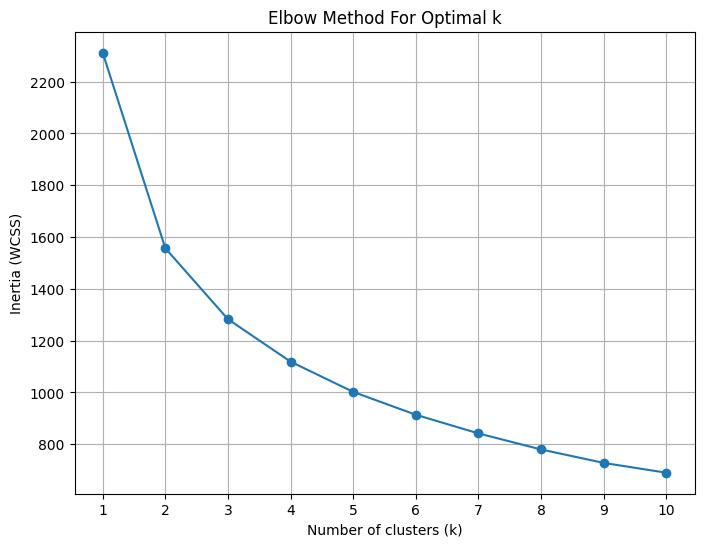

In [73]:
inertia = []

# Step 2: Loop through different numbers of clusters (from 1 to 10)
for k in range(1, 11):
    # Initialize the KMeans model with 'k' clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to your PCA-reduced data
    kmeans.fit(pca_df_reduced)
    
    # Append the inertia (within-cluster sum of squares) to the list
    inertia.append(kmeans.inertia_)

# Step 3: Plot the inertia values against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(range(1, 11))  # Ensures that all numbers 1-10 are shown on x-axis
plt.grid(True)
plt.show()

Using the elbow method, we can find that the optimal number of clusters is 4. Hence we apply k means again with k=4 and plot the clusters

In [74]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with the optimal number of clusters
kmeans_opt = KMeans(n_clusters=4, random_state=42)

# Fit the K-Means model to your reduced PCA data
kmeans_opt.fit(pca_df_reduced)

# Get the cluster labels for each data point
cluster_labels_opt = kmeans_opt.labels_

# Add the cluster labels to your PCA-reduced DataFrame
pca_df_reduced['Cluster_opt'] = cluster_labels_opt

pca_df_reduced.head()

c:\Users\Rayhaan\Desktop\IBM Machine Learning Cert\Unsupervised Learning\Code\Customer-Segmentation-Unsupervised-Learning\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rayhaan\AppData\Local\Temp\ipykernel_30872\4001827724.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df_reduced['Cluster_opt'] = cluster_labels_opt


,PC1,PC2,PC3,PC4,Cluster_opt
0,-1.598145,0.100747,0.103433,-1.474721,3
1,-1.571368,-0.758611,-0.048862,0.056410,3
2,-1.565324,-1.498033,-0.964456,-0.036027,3
3,0.874321,-1.196092,-0.187217,0.424926,0
4,-0.774474,-1.941810,-0.285751,-0.152121,0


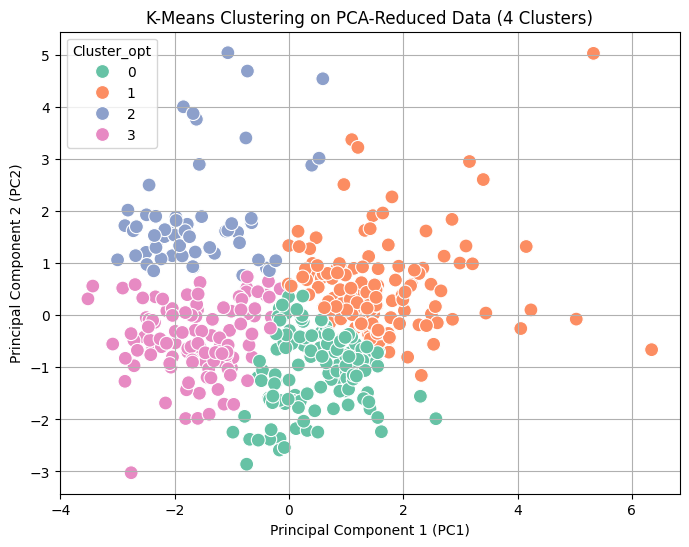

In [77]:

# Create a scatter plot of the first two principal components with the cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', y='PC2', # First two principal components
    hue='Cluster_opt', # Color by cluster label
    data=pca_df_reduced, # Your PCA-reduced data with cluster labels
    palette='Set2', # Choose a color palette
    s=100, # Marker size
    legend='full'
)

# Add title and labels
plt.title('K-Means Clustering on PCA-Reduced Data (4 Clusters)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()
